 # Instacart Market Basket Analysis

Let's Start with Importing the Modules 

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

List out the files and their size that are present in directory 

In [91]:
INPUT_FOLDER='/Users/pd186040/Documents/Kaggle/Instacart/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
.DS_Store                     6.15 KB
aisles.csv                    2.6 KB
departments.csv               0.27 KB
Instacart Market Basket Analysis.pptx1254.23 KB
Instacart.ipynb               746.78 KB
order_products__prior.csv     577550.71 KB
order_products__train.csv     24680.15 KB
orders.csv                    108968.65 KB
products.csv                  2166.95 KB
Zip Files                     0.31 KB


Let us first read all the files as dataframe objects and then look at the top few rows.

In [92]:
order_products_train_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/order_products__train.csv")
order_products_prior_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/order_products__prior.csv")
orders_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/orders.csv")
products_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/products.csv")
aisles_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/aisles.csv")
departments_df = pd.read_csv("/Users/pd186040/Documents/Kaggle/Instacart/departments.csv")

In [93]:
print("The orders_df size is :", orders_df.shape)

The orders_df size is : (3421083, 7)


In [94]:
orders_df.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.

We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

In [95]:
print("The order_products_prior_df size is : ", order_products_prior_df.shape)

The order_products_prior_df size is :  (32434489, 4)


In [96]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [97]:
print("The order_products_train_df size is : ", order_products_train_df.shape)

The order_products_train_df size is :  (1384617, 4)


In [98]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?

As mentioned earlier, in this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. 

In [99]:
print("The products_df size is :", products_df.shape)

The products_df size is : (49688, 4)


In [100]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [101]:
print("The aisles_df size is :", aisles_df.shape)

The aisles_df size is : (134, 2)


In [102]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [103]:
print("The departments_df size is :", departments_df.shape)

The departments_df size is : (21, 2)


In [104]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# Data Cleaning

In [105]:
#checking for missing values
total=orders_df.isnull().sum()
total

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [106]:
#checking for the percentage
percentage=total/orders_df.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [107]:
missing_value_table_orders = pd.concat([total,percentage],keys=['Total','Percentage'],axis=1)
missing_value_table_orders

,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


We can see that only 6% of days_since_prior_order column is null. So we can exclude them and use the data.

In [108]:
orders_df_new=orders_df[orders_df['days_since_prior_order'].notnull()]
orders_df_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


Similarly, we check for missing values for all the other 5 data sets to clean the data.

In [109]:
#aisles
total_a=aisles_df.isnull().count()
total_a

aisle_id    134
aisle       134
dtype: int64

In [110]:
percentage_a=total_a/aisles_df.isnull().count()
percentage_a

aisle_id    1.0
aisle       1.0
dtype: float64

In [111]:
missing_value_table_aisles = pd.concat([total_a, percentage_a],keys=['Total','Percentage'],axis=1)
missing_value_table_aisles

,Total,Percentage
aisle_id,134,1.0
aisle,134,1.0


In [112]:
#departments
total_d=departments_df.isnull().count()
total_d

department_id    21
department       21
dtype: int64

In [113]:
percentage_d=total_d/departments_df.isnull().count()
percentage_d

department_id    1.0
department       1.0
dtype: float64

In [114]:
missing_value_table_departments = pd.concat([total_d,percentage_d],keys=['Total','Percentage'],axis=1)
missing_value_table_departments

,Total,Percentage
department_id,21,1.0
department,21,1.0


In [115]:
#orders_prior
total_order_p_p=order_products_prior_df.isnull().sum()
total_order_p_p

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [116]:
percentage_order_p_p=total_order_p_p/order_products_prior_df.isnull().count()
percentage_order_p_p

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [117]:
missing_value_table_order_p_p = pd.concat([total_order_p_p,percentage_order_p_p],keys=['Total','Percentage'],axis=1)
missing_value_table_order_p_p

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [118]:
#order_train
total_order_train=order_products_train_df.isnull().sum()
total_order_train

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [119]:
percentage_order_train=total_order_train/order_products_train_df.isnull().count()
percentage_order_train

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [120]:
missing_value_table_order_train = pd.concat([total_order_train,percentage_order_train],keys=['Total','Percentage'],axis=1)
missing_value_table_order_train

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [121]:
#products
total_products=products_df.isnull().sum()
total_products

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [122]:
percentage_products=total_products/products_df.isnull().count()
percentage_products

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [123]:
missing_value_table_products = pd.concat([total_products,percentage_products],keys=['Total','Percentage'],axis=1)
missing_value_table_products

,Total,Percentage
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0



Looking at the other 5 data sets we see that there are no missing values and hence conclude the data cleaning process

# Exploratory Data Analysis & Data Visualization



Let us first get the count of rows in each of the three sets.

In [124]:
def get_unique_count(x):
    return len(np.unique(x))


cnt_eval = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_eval

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

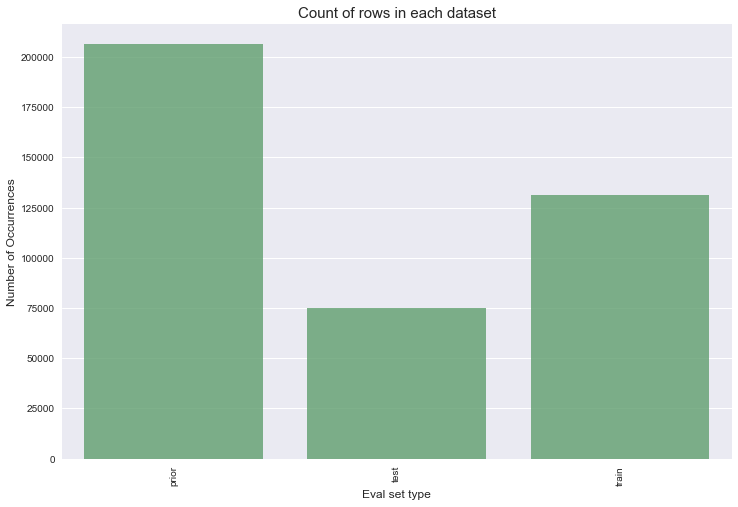

In [125]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_eval.index, cnt_eval.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.

In [126]:
count=orders_df['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

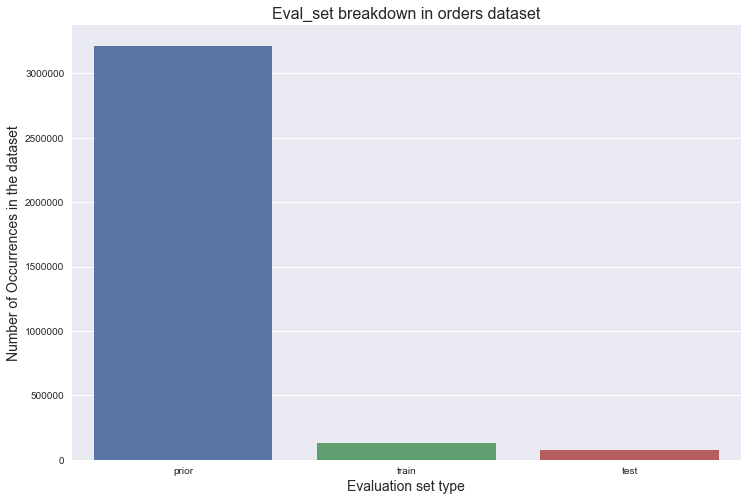

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

Now let us validate the claim that 4 to 100 orders of a customer are given.

In [128]:
cnt_orders = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_orders = cnt_orders.order_number.value_counts()


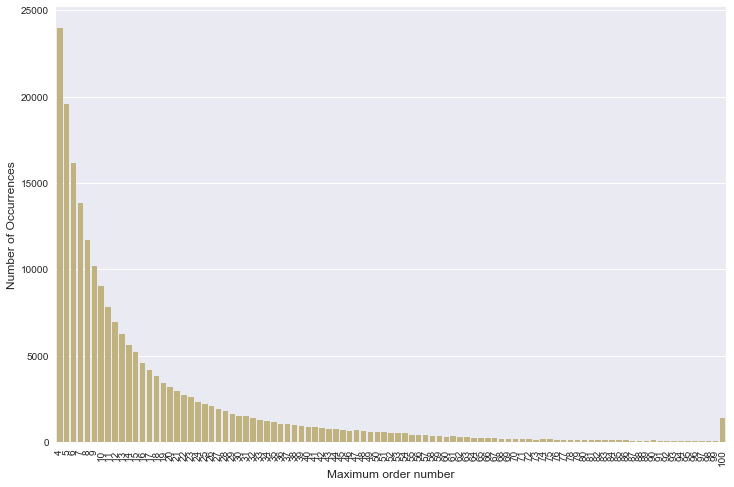

In [129]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_orders.index, cnt_orders.values, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max at 100 as given in the data page

# Time of Order

Time at which people usually order products.

# Days of Orders in a week:

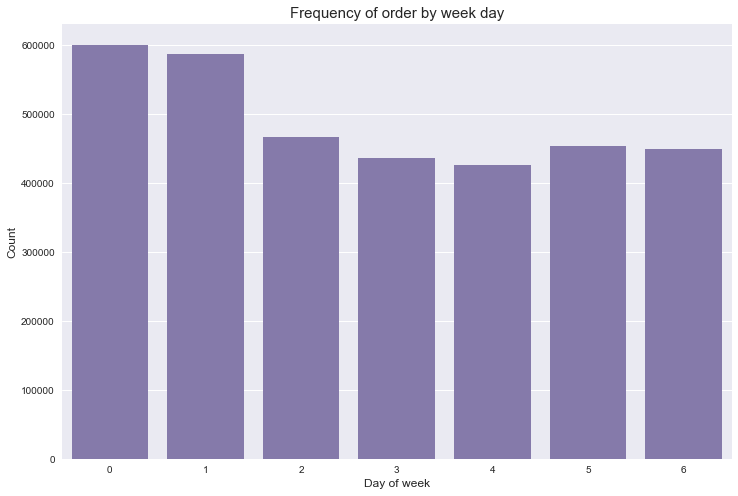

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 is Saturday and Sunday when the orders are high

# Hour of Order in a Day:

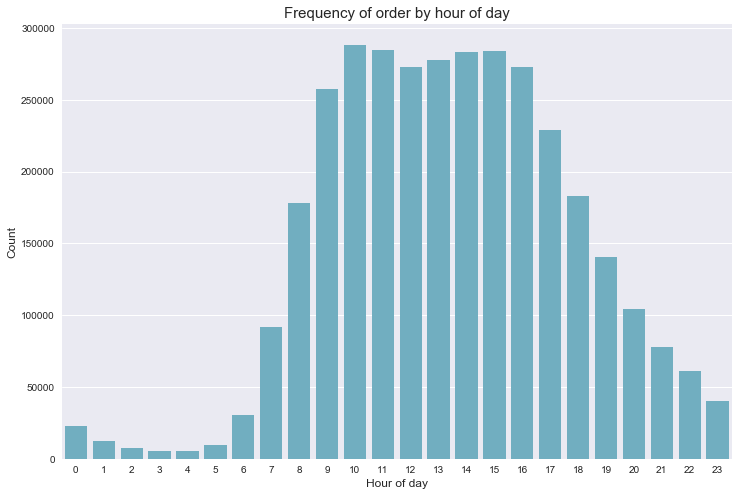

In [131]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[5])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

People mostly order between 8 and 19 (probably between 8 a.m and 7 p.m.)

 Now let us combine the day of week and hour of day to see the distribution.

In [132]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [133]:
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_df

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


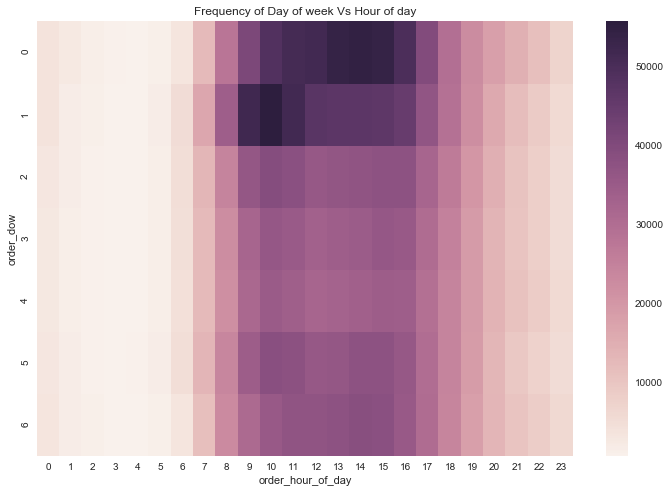

In [134]:
plt.figure(figsize=(12,8))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

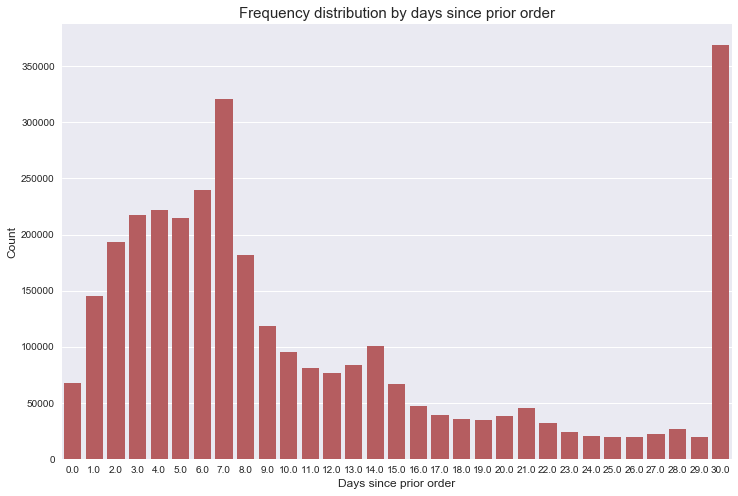

In [135]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

From this plot we can see that 7th day is where we have a spike, and then a relative small peak at days 14,21 and 28 which indicates that every 7 days or weekly is the order frequency. And then again there's a huge peak at the end of the month indicating that there's a monthly peak

Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

In [136]:
# percentage of re-orders in orders_products_prior
print("Percent of reorders in prior set:") 
print(order_products_prior_df.reordered.sum() / len(order_products_prior_df))

Percent of reorders in prior set:
0.5896974667922161


In [137]:
# percentage of re-orders in orders_products_train
print("Percent of reorders in train set:") 
print(order_products_train_df.reordered.sum() / len(order_products_train_df))

Percent of reorders in train set:
0.5985944127509629


On an average, about 59% of the products in an order are re-ordered products

Now let us merge these product details with the order_prior details.

In [138]:
#merging order_products_prior and products
order_products_prior_df_merged = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

#merging op_merged with aisles
order_products_prior_df_merged = pd.merge(order_products_prior_df_merged, aisles_df, on='aisle_id', how='left')

#merging the new op_prior_merged with departments
order_products_prior_df_merged = pd.merge(order_products_prior_df_merged, departments_df, on='department_id', how='left')

In [139]:
order_products_prior_df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


# Most ordered Products
Now let's identify which products are ordered the most.

In [140]:
cnt_srs = order_products_prior_df_merged['product_name'].value_counts().reset_index().head(10)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


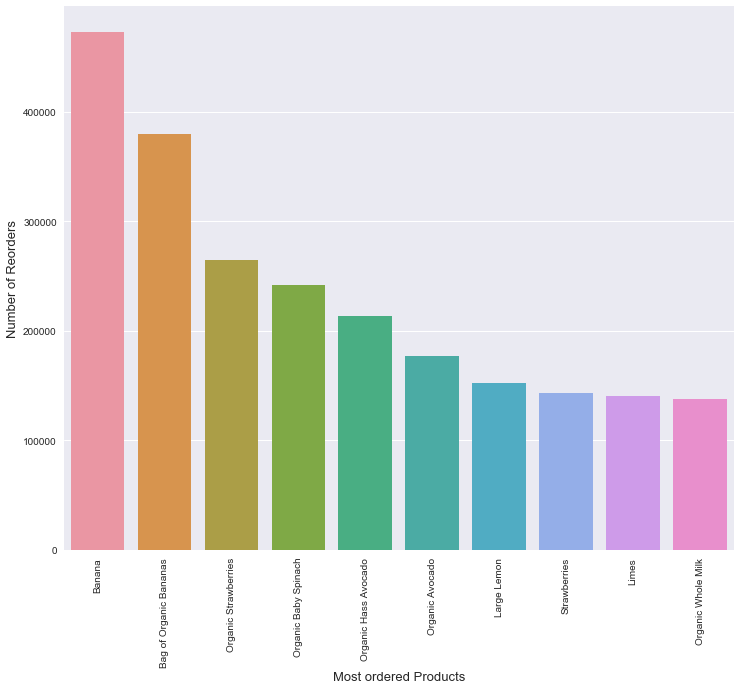

In [141]:
cnt_srs = cnt_srs.groupby(['product_name']).sum()['frequency_count'].sort_values(ascending=False)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

# Aisles:

Now let us look at the important aisles.

In [142]:
cnt_aisle = order_products_prior_df_merged['aisle'].value_counts().head(20)
cnt_aisle

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

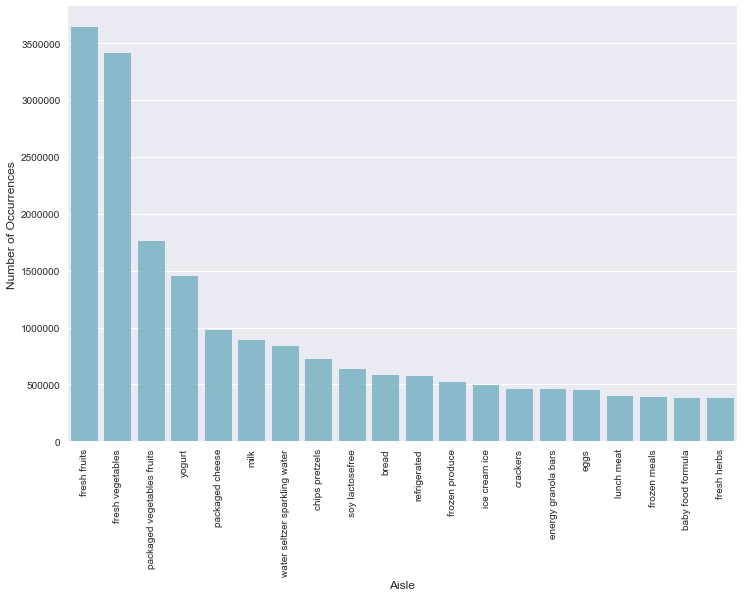

In [143]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_aisle.index, cnt_aisle.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

From this graph we can see that the fresh food and fresh vegetables aisles are the most frequently visited. We can do the same analysis for department

# Department Distribution:

Let us now check the department wise distribution.

In [144]:
cnt_aisle = order_products_prior_df_merged['department'].value_counts().head(20)
cnt_aisle

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64

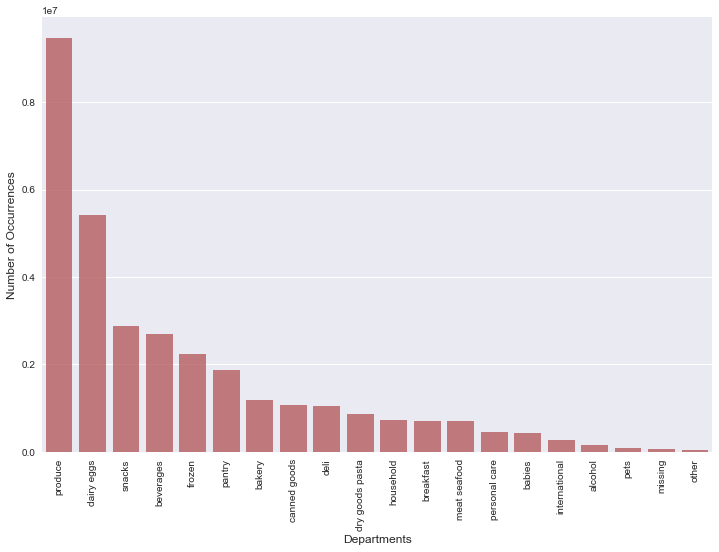

In [145]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_aisle.index, cnt_aisle.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

From the graph we can see that the department wise frequency is more for produce which aligns with the aisles frequency and then for dairy eggs.

# Most important Aisles in each Department

In [146]:
grouped =order_products_prior_df_merged.groupby(["department", "aisle"])["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped.head()

/Users/pd186040/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,department,aisle,Total_products
118,produce,fresh fruits,3642188
120,produce,fresh vegetables,3418021
122,produce,packaged vegetables fruits,1765313
42,dairy eggs,yogurt,1452343
38,dairy eggs,packaged cheese,979763


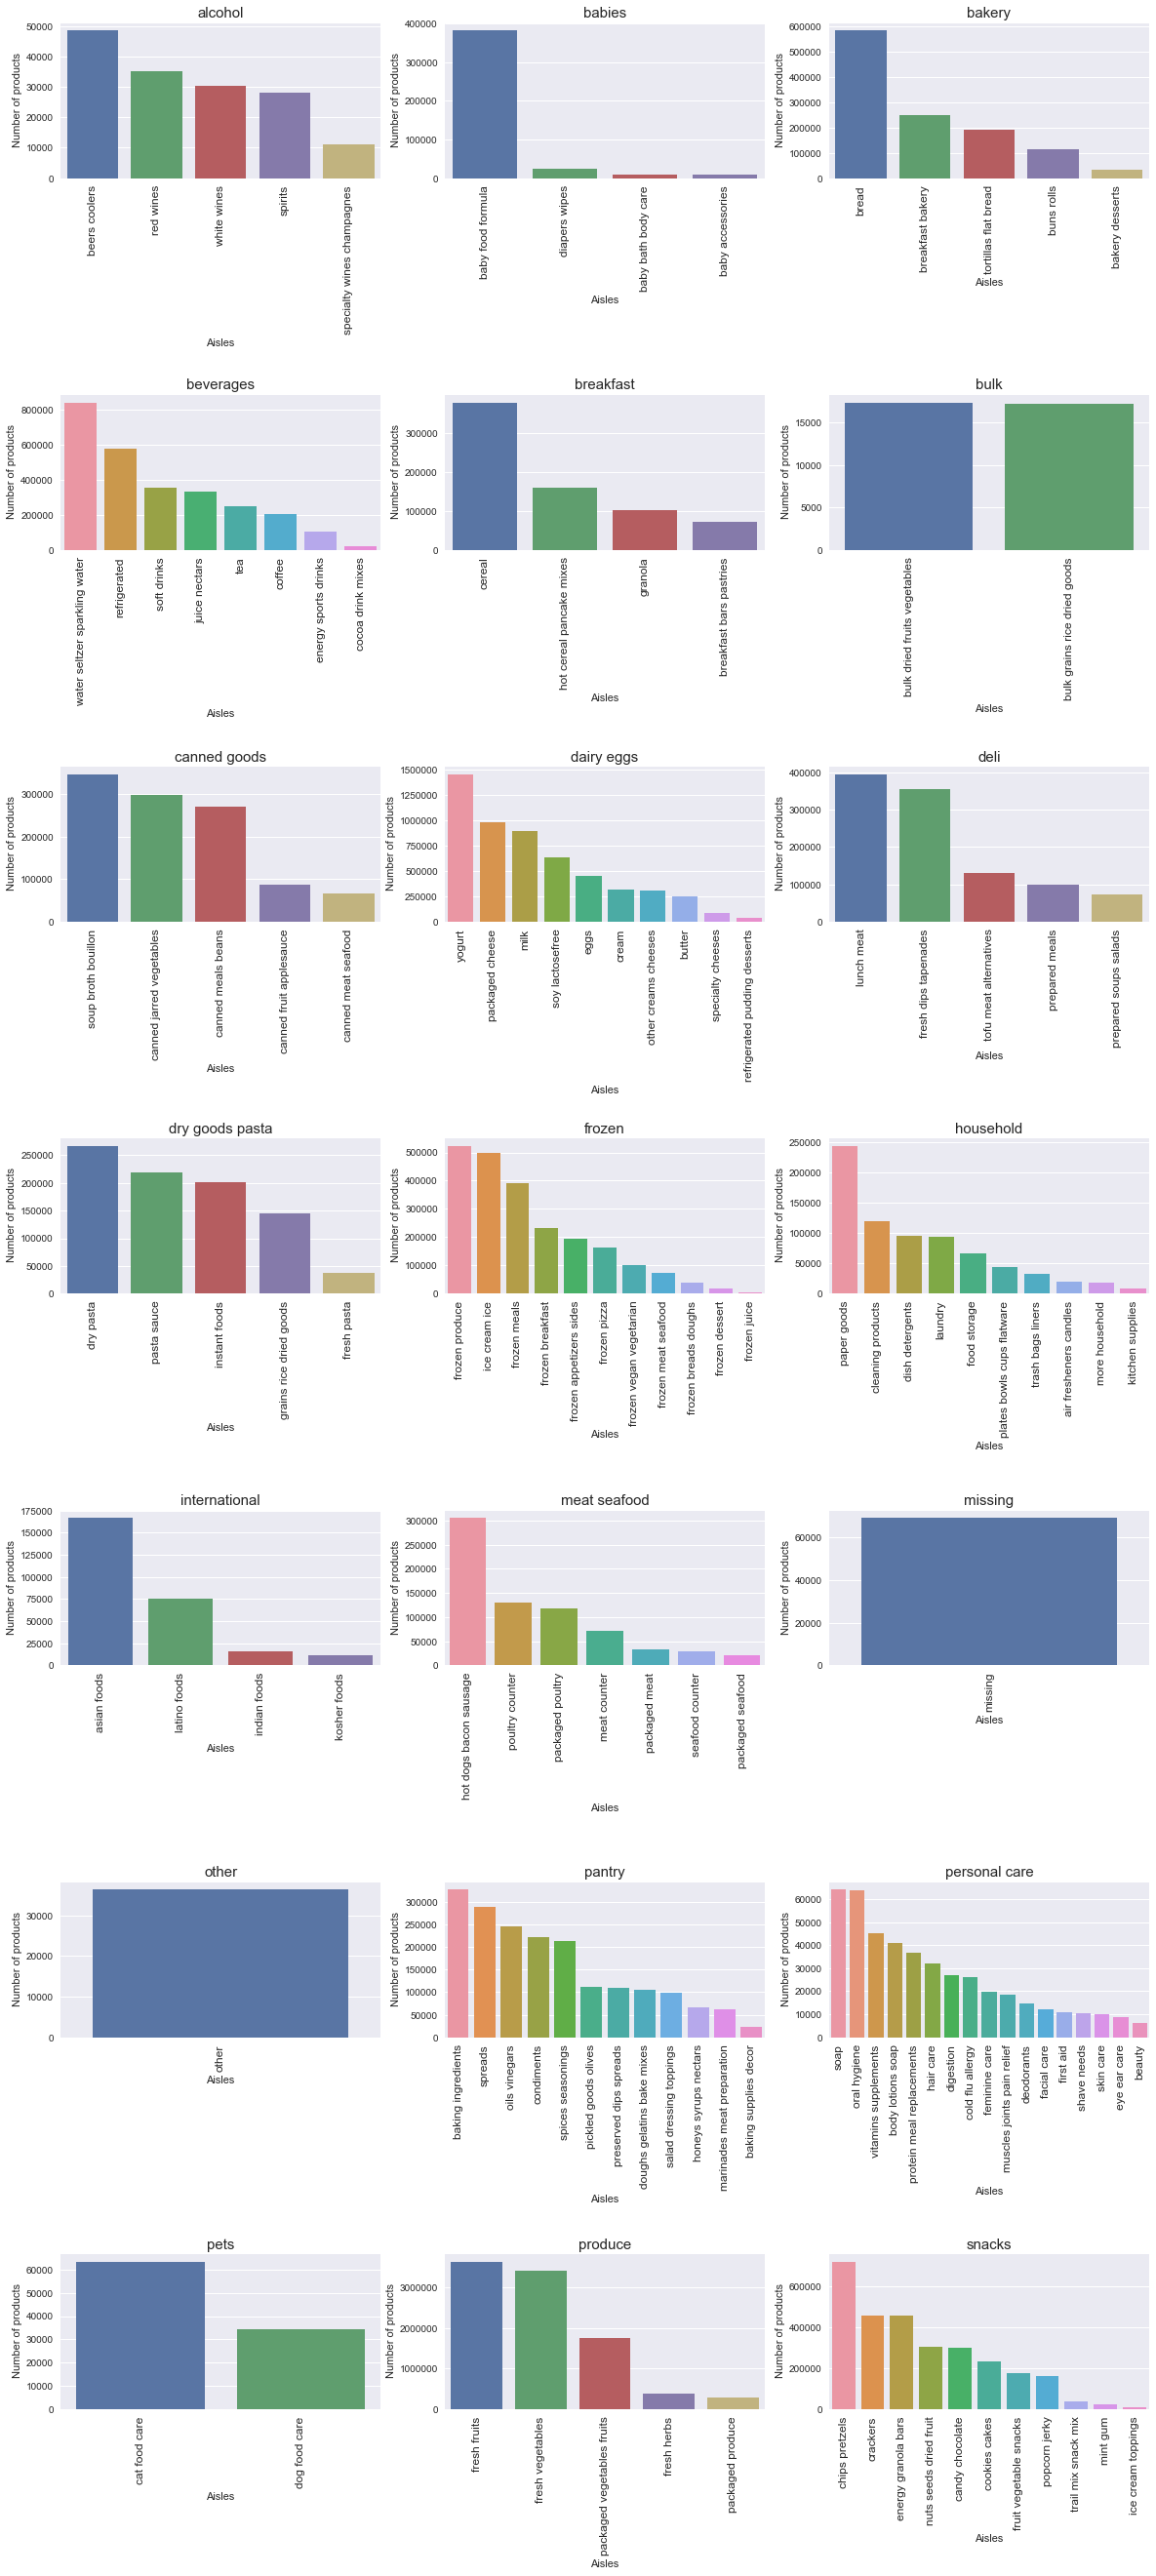

In [147]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

# Reorders:

In [148]:
#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [149]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

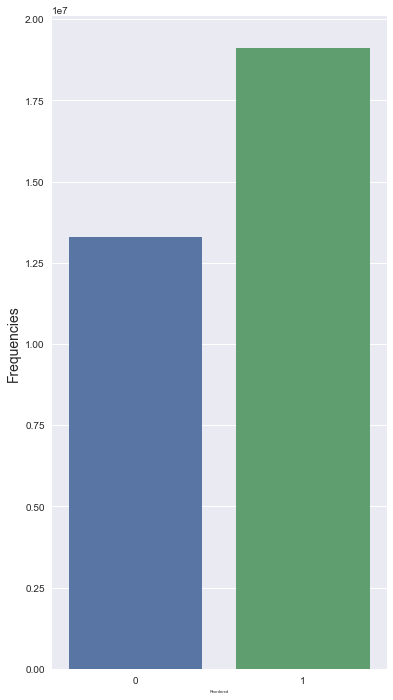

In [150]:
plt.figure(figsize=(6,12))
sns.barplot(count_reordered.index, count_reordered.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Reordered', fontsize=4)
plt.show()

In [151]:
#finding reorders against day of the week
grouped_reorders_dow = merged_reorders.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reorders_dow

,order_dow,reordered
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


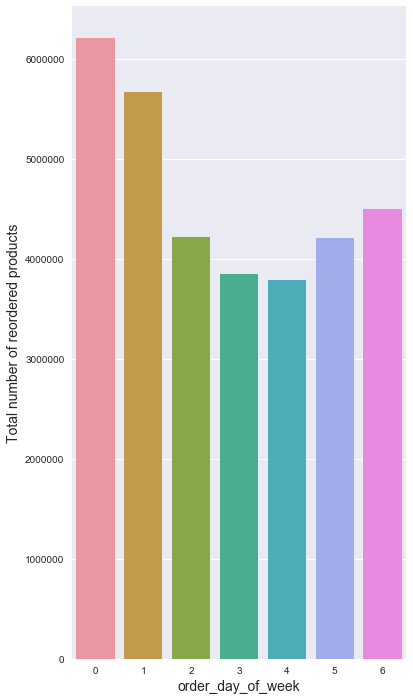

In [152]:
plt.figure(figsize=(6,12))
sns.barplot(grouped_reorders_dow.order_dow, grouped_reorders_dow.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_day_of_week', fontsize=14)
plt.show()

From this graph, we can see that most products are reordered on Saturday followed by Sunday and Friday. Which follows the same trend as orders placed over the week.

In [153]:
#finding reorders against hour of the day
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders

,order_hour_of_day,reordered
0,0,218948
1,1,115786
2,2,69434
3,3,51321
4,4,53283
5,5,88062
6,6,290795
7,7,891937
8,8,1719973
9,9,2456713


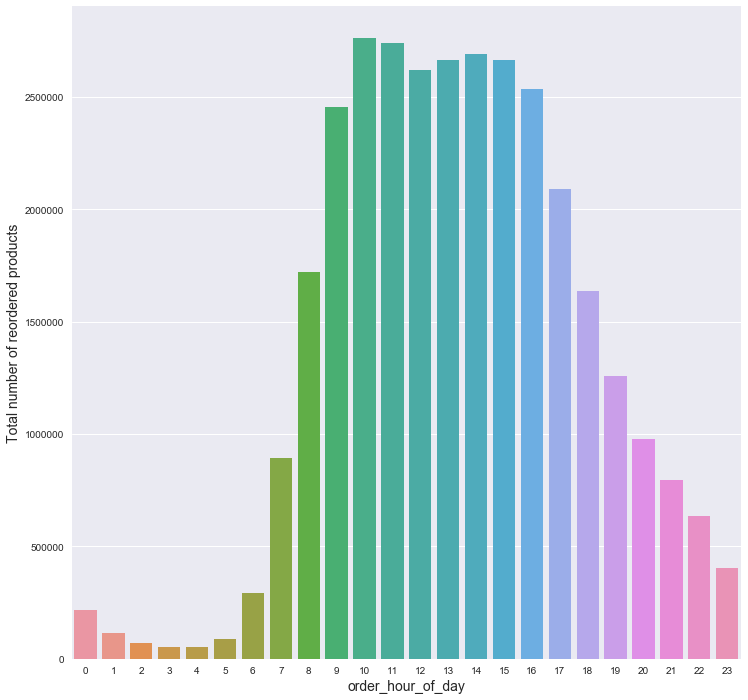

In [154]:
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_hour_of_day', fontsize=14)
plt.show()

This graph shows that most products are reordered from 9am-5pm. This aligns with the number of products ordered during the week and the weekends.

In [155]:
merged1 = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [156]:
df_merged1 = pd.merge(merged1, products_df, on='product_id', how='left')
df_merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15


In [157]:
#merging all the datasets to get a final train dataset
df = pd.merge(df_merged1, departments_df, on='department_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [158]:
df_new = df.copy()
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [159]:
del df['eval_set']

In [160]:
del df['add_to_cart_order']

In [161]:
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


# Algo

In [162]:

#Variable to be predicted
y=df['reordered']

In [163]:
del df['reordered']
del df['product_name']
del df['department']

In [164]:
df.head()

,order_id,product_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,112108,4,4,10,9.0,120,16
1,1,11109,112108,4,4,10,9.0,108,16
2,1,10246,112108,4,4,10,9.0,83,4
3,1,49683,112108,4,4,10,9.0,83,4
4,1,43633,112108,4,4,10,9.0,95,15


In [165]:

from sklearn.model_selection import train_test_split

In [166]:
Xtr, Xtest, ytr, ytest = train_test_split(df, y, test_size=0.30, random_state=5)


In [167]:
Xtr.shape


(969231, 9)

In [168]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [169]:

#Logistic Regression model
clf=(LogisticRegression(C=0.02))

In [170]:
#fitting the model
clf.fit(Xtr, ytr)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
#predictions
pred=clf.predict(Xtest)

In [172]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [173]:
#accuracy score of Logistic Regression Model
print(accuracy_score(clf.predict(Xtest), ytest))

0.598684115497
